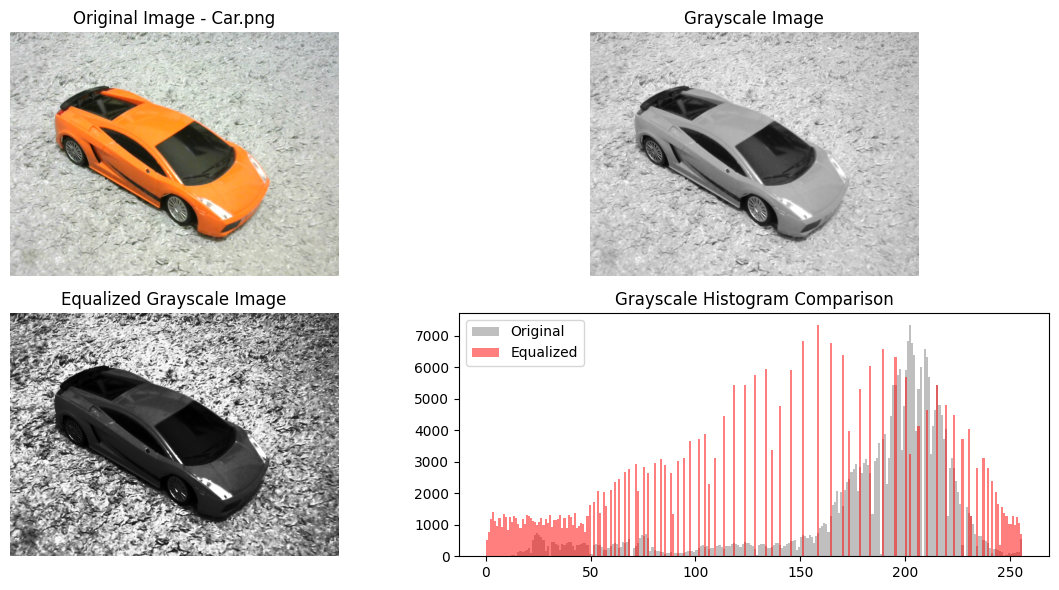

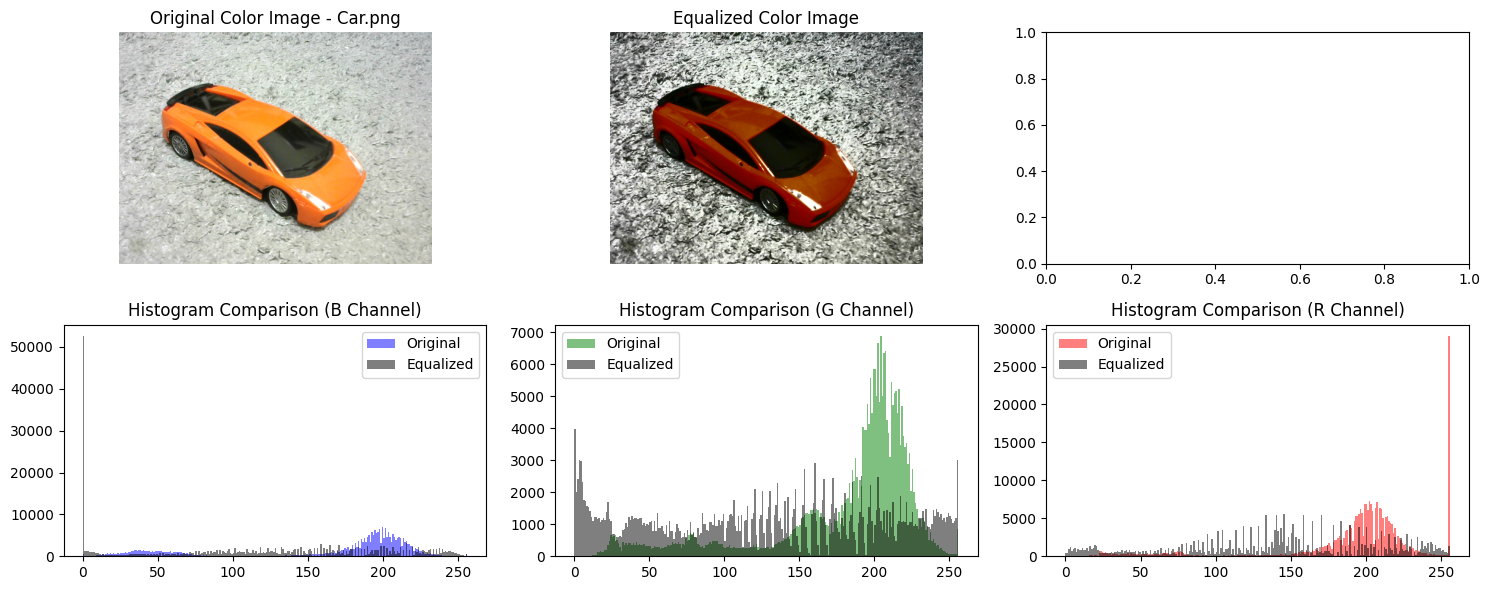

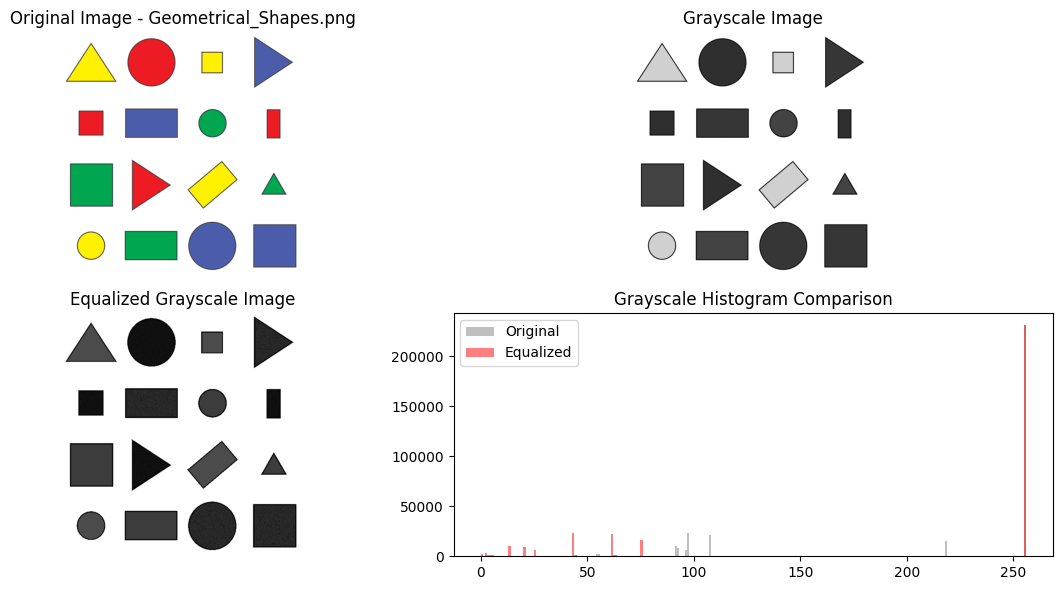

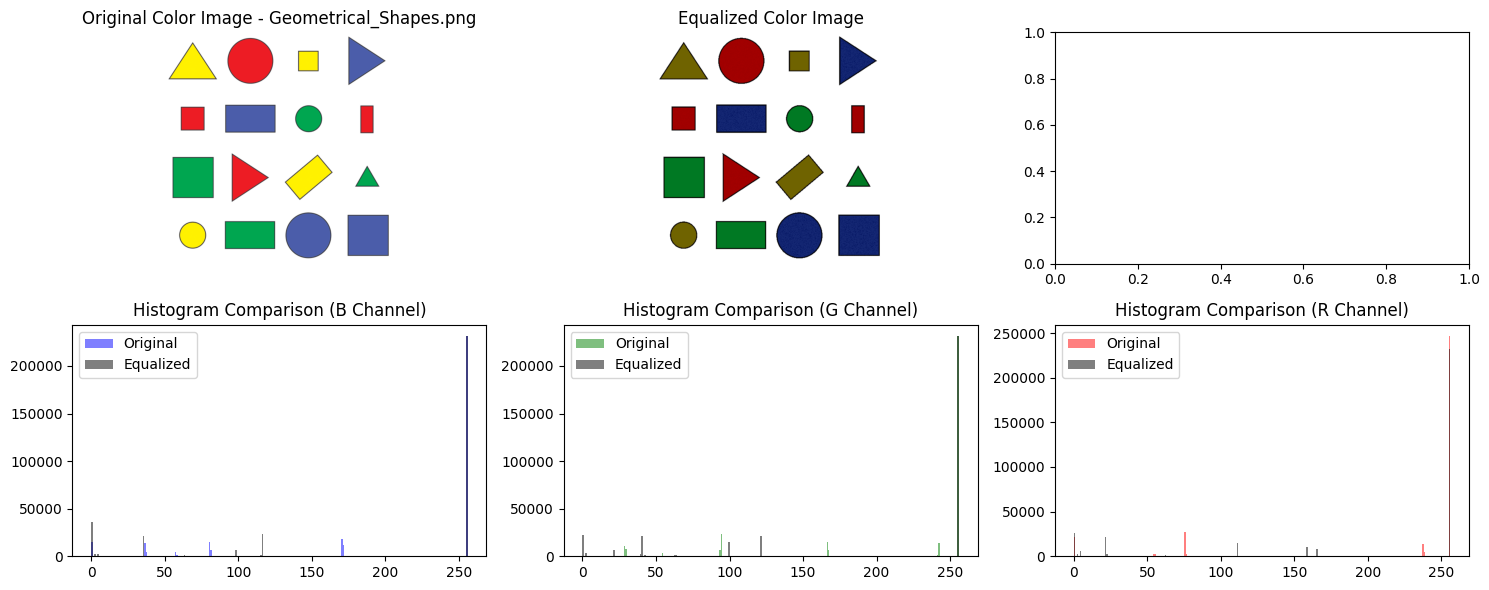

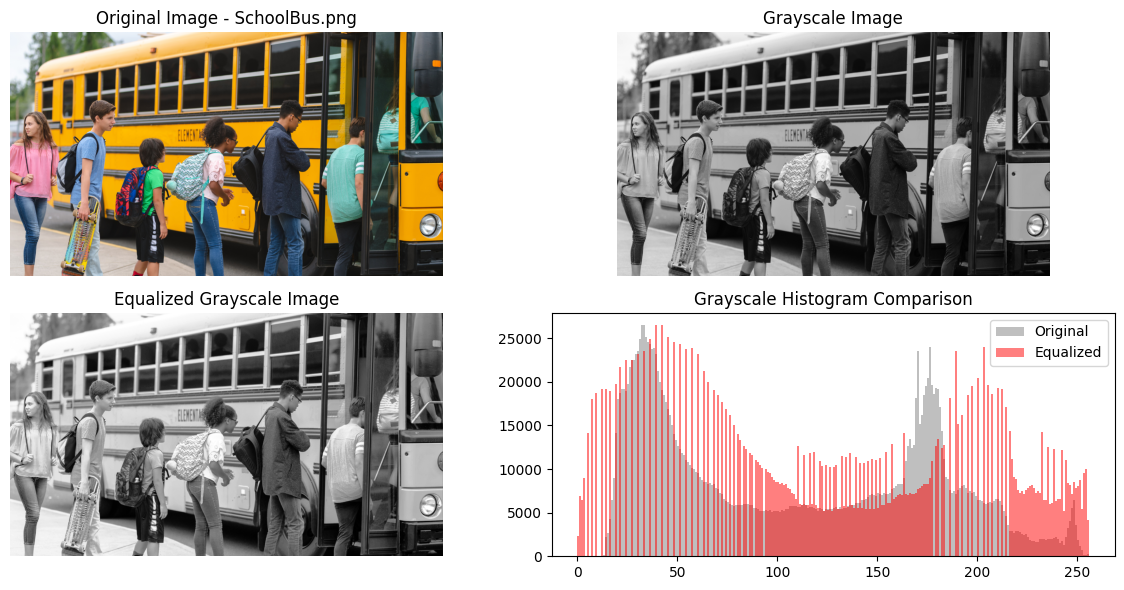

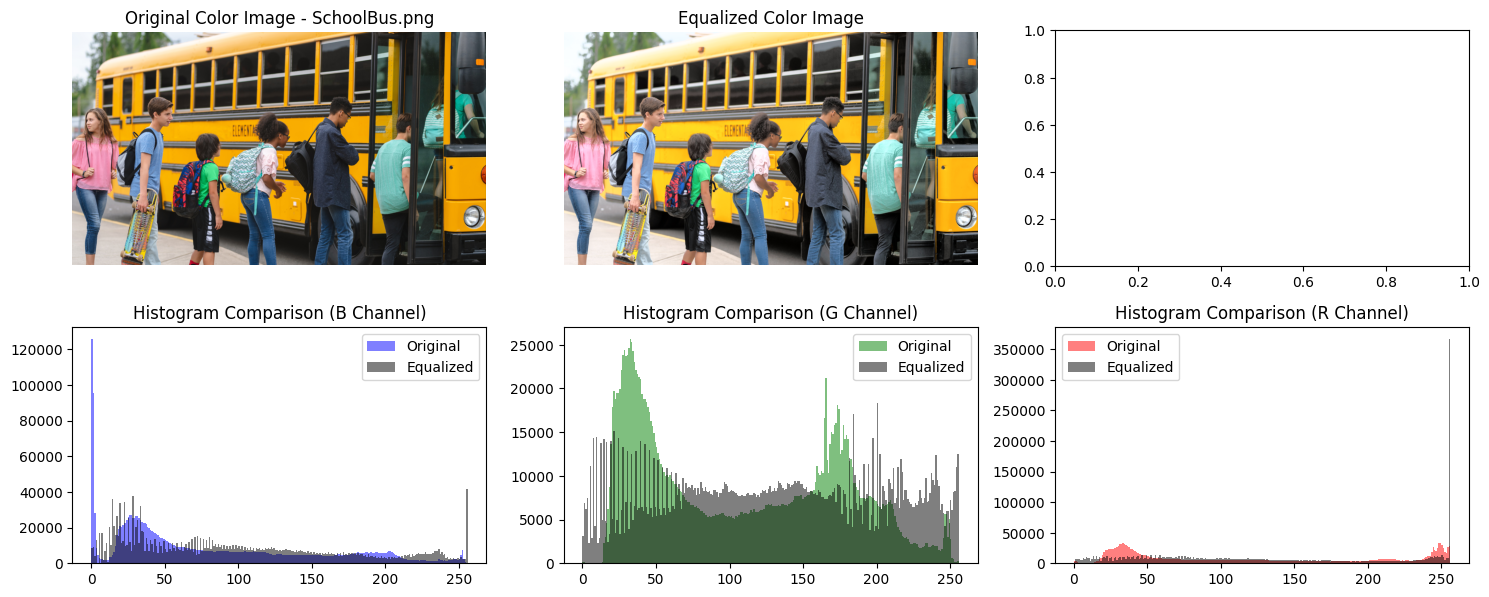

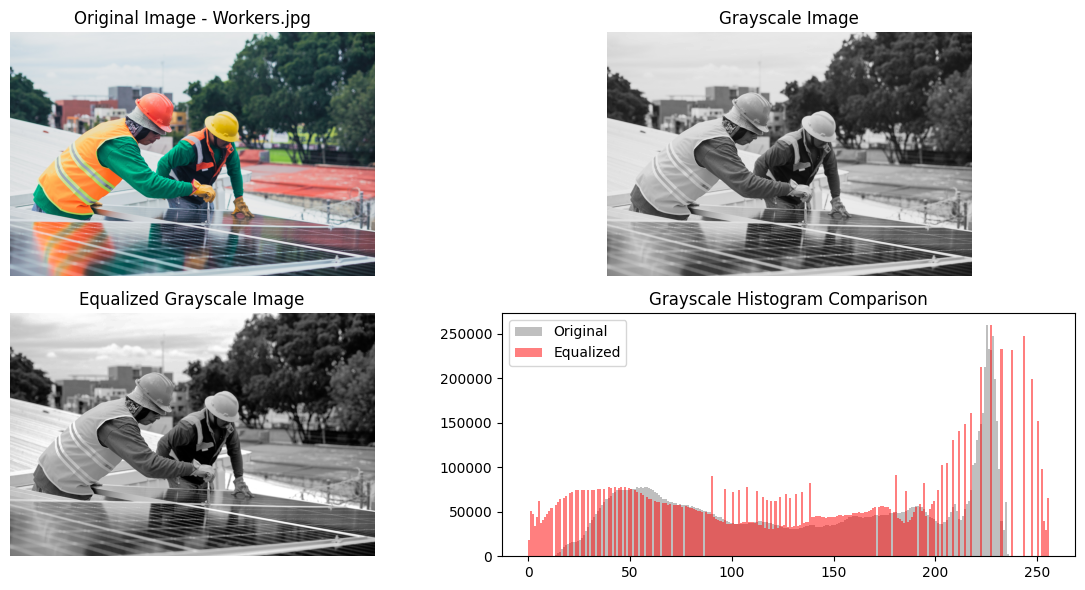

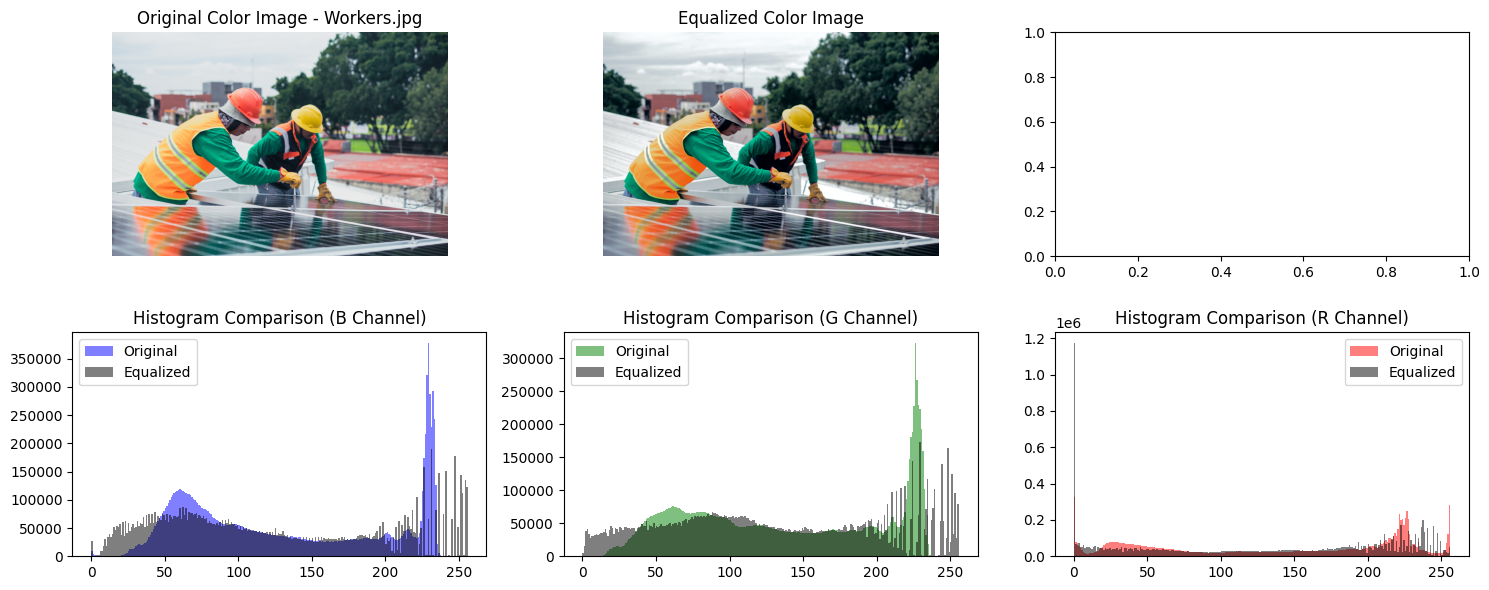

In [ ]:
# Comments about histograms:
# The histogram of the grayscale image shows the distribution of pixel intensities in a single channel.
# After histogram equalization, the grayscale histogram becomes more spread out, indicating better contrast.

# The histogram of the color image is different because it shows the distribution of pixel intensities for each color channel (B, G, R).
# Each color channel has its own histogram, and the equalization process is applied to the luminance channel (Y) in the YUV color space.
# This results in the histograms of the color channels being adjusted differently compared to the grayscale image.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Get all image files from the current directory
image_folder = "."  # Assumes images are in the same folder as the notebook
image_extensions = (".png", ".jpg", ".jpeg")

image_paths = [f for f in os.listdir(image_folder) if f.lower().endswith(image_extensions)]
if not image_paths:
    print("No images found in the directory.")
else:
    for image_file in image_paths:
        img = cv2.imread(image_file)
        if img is None:
            print(f"Error loading image: {image_file}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        equalized_gray = cv2.equalizeHist(gray)

        # Display original and equalized grayscale images with histograms
        fig, axes = plt.subplots(2, 2, figsize=(12, 6))
        axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[0, 0].set_title(f"Original Image - {image_file}")
        axes[0, 0].axis("off")

        axes[0, 1].imshow(gray, cmap="gray")
        axes[0, 1].set_title("Grayscale Image")
        axes[0, 1].axis("off")

        axes[1, 0].imshow(equalized_gray, cmap="gray")
        axes[1, 0].set_title("Equalized Grayscale Image")
        axes[1, 0].axis("off")

        axes[1, 1].hist(gray.ravel(), bins=256, range=[0, 256], color="gray", alpha=0.5, label="Original")
        axes[1, 1].hist(equalized_gray.ravel(), bins=256, range=[0, 256], color="red", alpha=0.5, label="Equalized")
        axes[1, 1].set_title("Grayscale Histogram Comparison")
        axes[1, 1].legend()
        plt.tight_layout()
        plt.show()

        # Apply histogram equalization to color image
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        equalized_color = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

        fig, axes = plt.subplots(2, 3, figsize=(15, 6))
        axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[0, 0].set_title(f"Original Color Image - {image_file}")
        axes[0, 0].axis("off")

        axes[0, 1].imshow(cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB))
        axes[0, 1].set_title("Equalized Color Image")
        axes[0, 1].axis("off")

        colors = ("b", "g", "r")
        for i, color in enumerate(colors):
            axes[1, i].hist(img[:, :, i].ravel(), bins=256, range=[0, 256], color=color, alpha=0.5, label="Original")
            axes[1, i].hist(equalized_color[:, :, i].ravel(), bins=256, range=[0, 256], color="black", alpha=0.5, label="Equalized")
            axes[1, i].set_title(f"Histogram Comparison ({color.upper()} Channel)")
            axes[1, i].legend()

        plt.tight_layout()
        plt.show()
